In [8]:
# ==============================
# Statistics and Trends Assignment
# ==============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# Load Dataset
# ------------------------------
#load animal data set
df = pd.read_csv("data.csv")

print("First 5 rows of dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())

First 5 rows of dataset:
   anime_id                         title  score  rank  popularity  members  \
0     28977                      Gintama°   9.05     8         347   680037   
1     57555  Chainsaw Man Movie: Reze-hen   9.18     2         962   282129   
2     11061        Hunter x Hunter (2011)   9.03     9           8  3107455   
3     52991             Sousou no Frieren   9.29     1         121  1269074   
4      9969                      Gintama'   9.02    11         406   601940   

                                            synopsis  start_date    end_date  \
0  Gintoki, Shinpachi, and Kagura return as the f...  2015-01-01  2016-01-01   
1                           Sequel to Chainsaw Man .  2025-01-01  2025-01-01   
2  Hunters devote themselves to accomplishing haz...  2011-01-01  2014-01-01   
3  During their decade-long quest to defeat the D...  2023-01-01  2024-01-01   
4  After a one-year hiatus, Shinpachi Shimura ret...  2011-01-01  2012-01-01   

    type  episodes 

In [9]:
df_clean = df.dropna(subset=["synopsis", "start_date", "end_date", "episodes"])
print(df_clean.isnull().sum())

anime_id      0
title         0
score         0
rank          0
popularity    0
members       0
synopsis      0
start_date    0
end_date      0
type          0
episodes      0
image_url     0
dtype: int64



Numeric Columns:
Index(['anime_id', 'score', 'rank', 'popularity', 'members', 'episodes'], dtype='object')

Statistical Moments for: anime_id
Mean      : 23922.875025216865
Variance  : 393565199.6868921
Skewness  : 0.31981818093586944
Kurtosis  : -1.3322230528588153


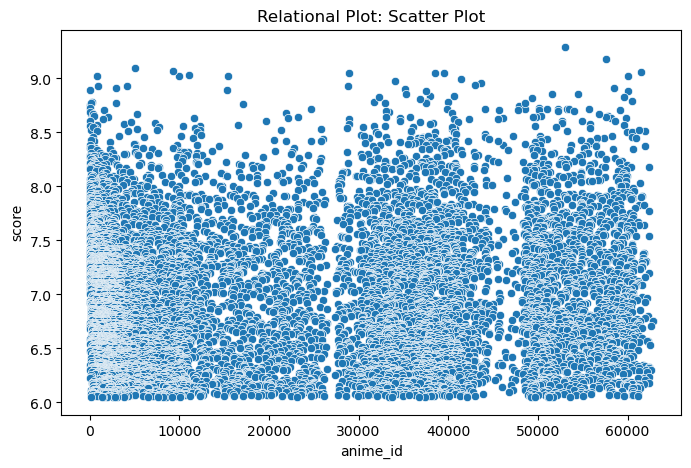

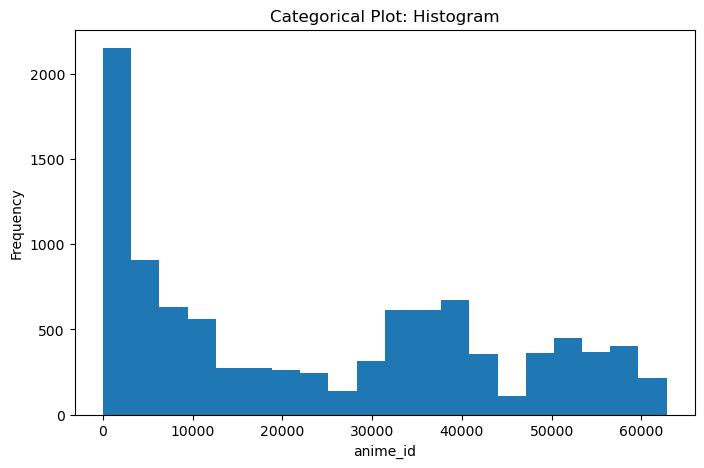

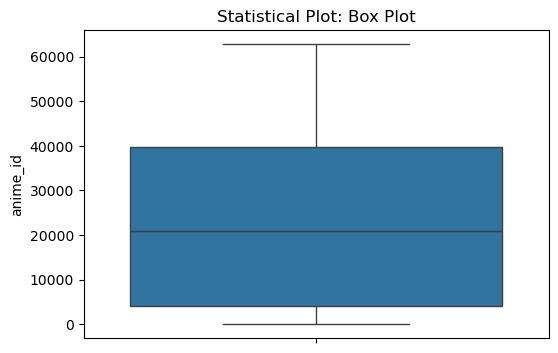

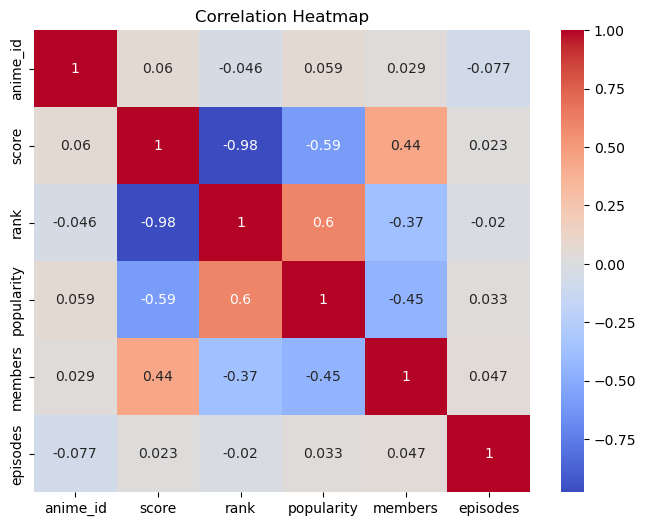

In [10]:
# ------------------------------
# Select Numeric Columns
# ------------------------------
numeric_cols = df_clean.select_dtypes(include=np.number)
print("\nNumeric Columns:")
print(numeric_cols.columns)

# Choose one numeric column for analysis
col = numeric_cols.columns[0]

# ------------------------------
# Statistical Moments
# ------------------------------
mean_val = numeric_cols[col].mean()
variance_val = numeric_cols[col].var()
skewness_val = numeric_cols[col].skew()
kurtosis_val = numeric_cols[col].kurt()

print("\nStatistical Moments for:", col)
print(f"Mean      : {mean_val}")
print(f"Variance  : {variance_val}")
print(f"Skewness  : {skewness_val}")
print(f"Kurtosis  : {kurtosis_val}")



# ------------------------------
# Relational Plot (Scatter Plot)
# ------------------------------
if len(numeric_cols.columns) >= 2:
    x_col = numeric_cols.columns[0]
    y_col = numeric_cols.columns[1]

    plt.figure(figsize=(8,5))
    sns.scatterplot(data=df, x=x_col, y=y_col)
    plt.title("Relational Plot: Scatter Plot")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

# ------------------------------
# Categorical Plot (Histogram)
# ------------------------------
plt.figure(figsize=(8,5))
plt.hist(numeric_cols[col], bins=20)
plt.title("Categorical Plot: Histogram")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.show()



# ------------------------------
# Statistical Plot (Box Plot)
# ------------------------------
plt.figure(figsize=(6,4))
sns.boxplot(y=numeric_cols[col])
plt.title("Statistical Plot: Box Plot")
plt.ylabel(col)
plt.show()

# ------------------------------
# Correlation Heatmap (Optional Bonus)
# ------------------------------
plt.figure(figsize=(8,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()